# U-Net inference

In [1]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import keras
import matplotlib.pyplot as plt

In [2]:
# Google Drive setup
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
@keras.saving.register_keras_serializable()
def jaccard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

@keras.saving.register_keras_serializable()
def jaccard_coef_loss(y_true, y_pred):
    return -jaccard_coef(y_true, y_pred)  # -1 multiplied as we want to minimize this value as loss function

In [4]:
model_path = "/content/gdrive/MyDrive/ECM_data/unet_ECM_final_50epochs_white_places.keras"
my_model = load_model(model_path)

In [5]:
img_path = '/content/gdrive/MyDrive/Inpainting/biharmonic.png'
img = load_img(img_path, target_size=(my_model.input_shape[1:3]))  # Match model input size
x = img_to_array(img)
x = x / 255.0  # Assuming model expects normalized values (0-1)
x = np.expand_dims(x, axis=0)

# Get segmentation mask
mask = my_model.predict(x)

1/1 [==============================] - 1s 688ms/step


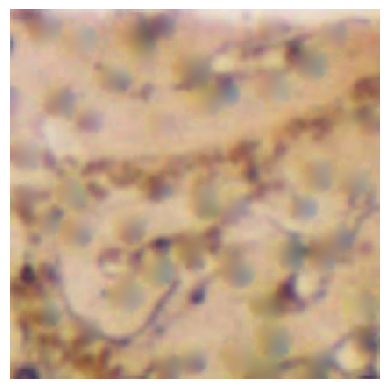

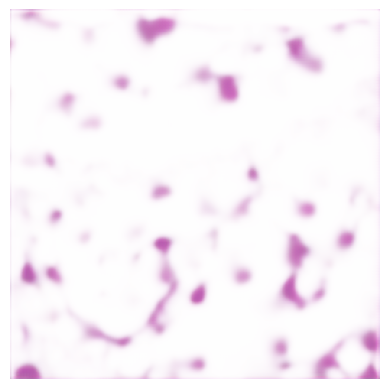

In [6]:
plt.imshow(img)
plt.axis('off')
# plt.savefig('pic.png')
plt.show()
mask = np.squeeze(mask)
plt.imshow(mask, cmap="gray")
plt.axis('off')
# plt.savefig('mask.png')
plt.show()

In [7]:
plt.imsave("pic.png", np.array(img))
plt.imsave("mask.png", mask, cmap="gray")

In [8]:
print(img)

<PIL.Image.Image image mode=RGB size=256x256 at 0x7AFACF69D510>
